In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
BAC = pd.read_csv('BAC.csv',parse_dates=True,index_col='Date')

In [3]:
JPM = pd.read_csv('JPM.csv',parse_dates=True,index_col='Date')

In [4]:
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

In [5]:
HSBC = pd.read_csv('HSBC.csv',parse_dates=True,index_col='Date')

In [6]:
RY = pd.read_csv('RY.csv',parse_dates=True,index_col='Date')

In [7]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [10]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

# Start Date For The Dataset

In [11]:
BAC.index.max()

Timestamp('2021-09-03 00:00:00')

# End Date For The Dataset

In [12]:
BAC.index.min()

Timestamp('2016-09-06 00:00:00')

# ADJ CLOSE Price For Last 5 Years

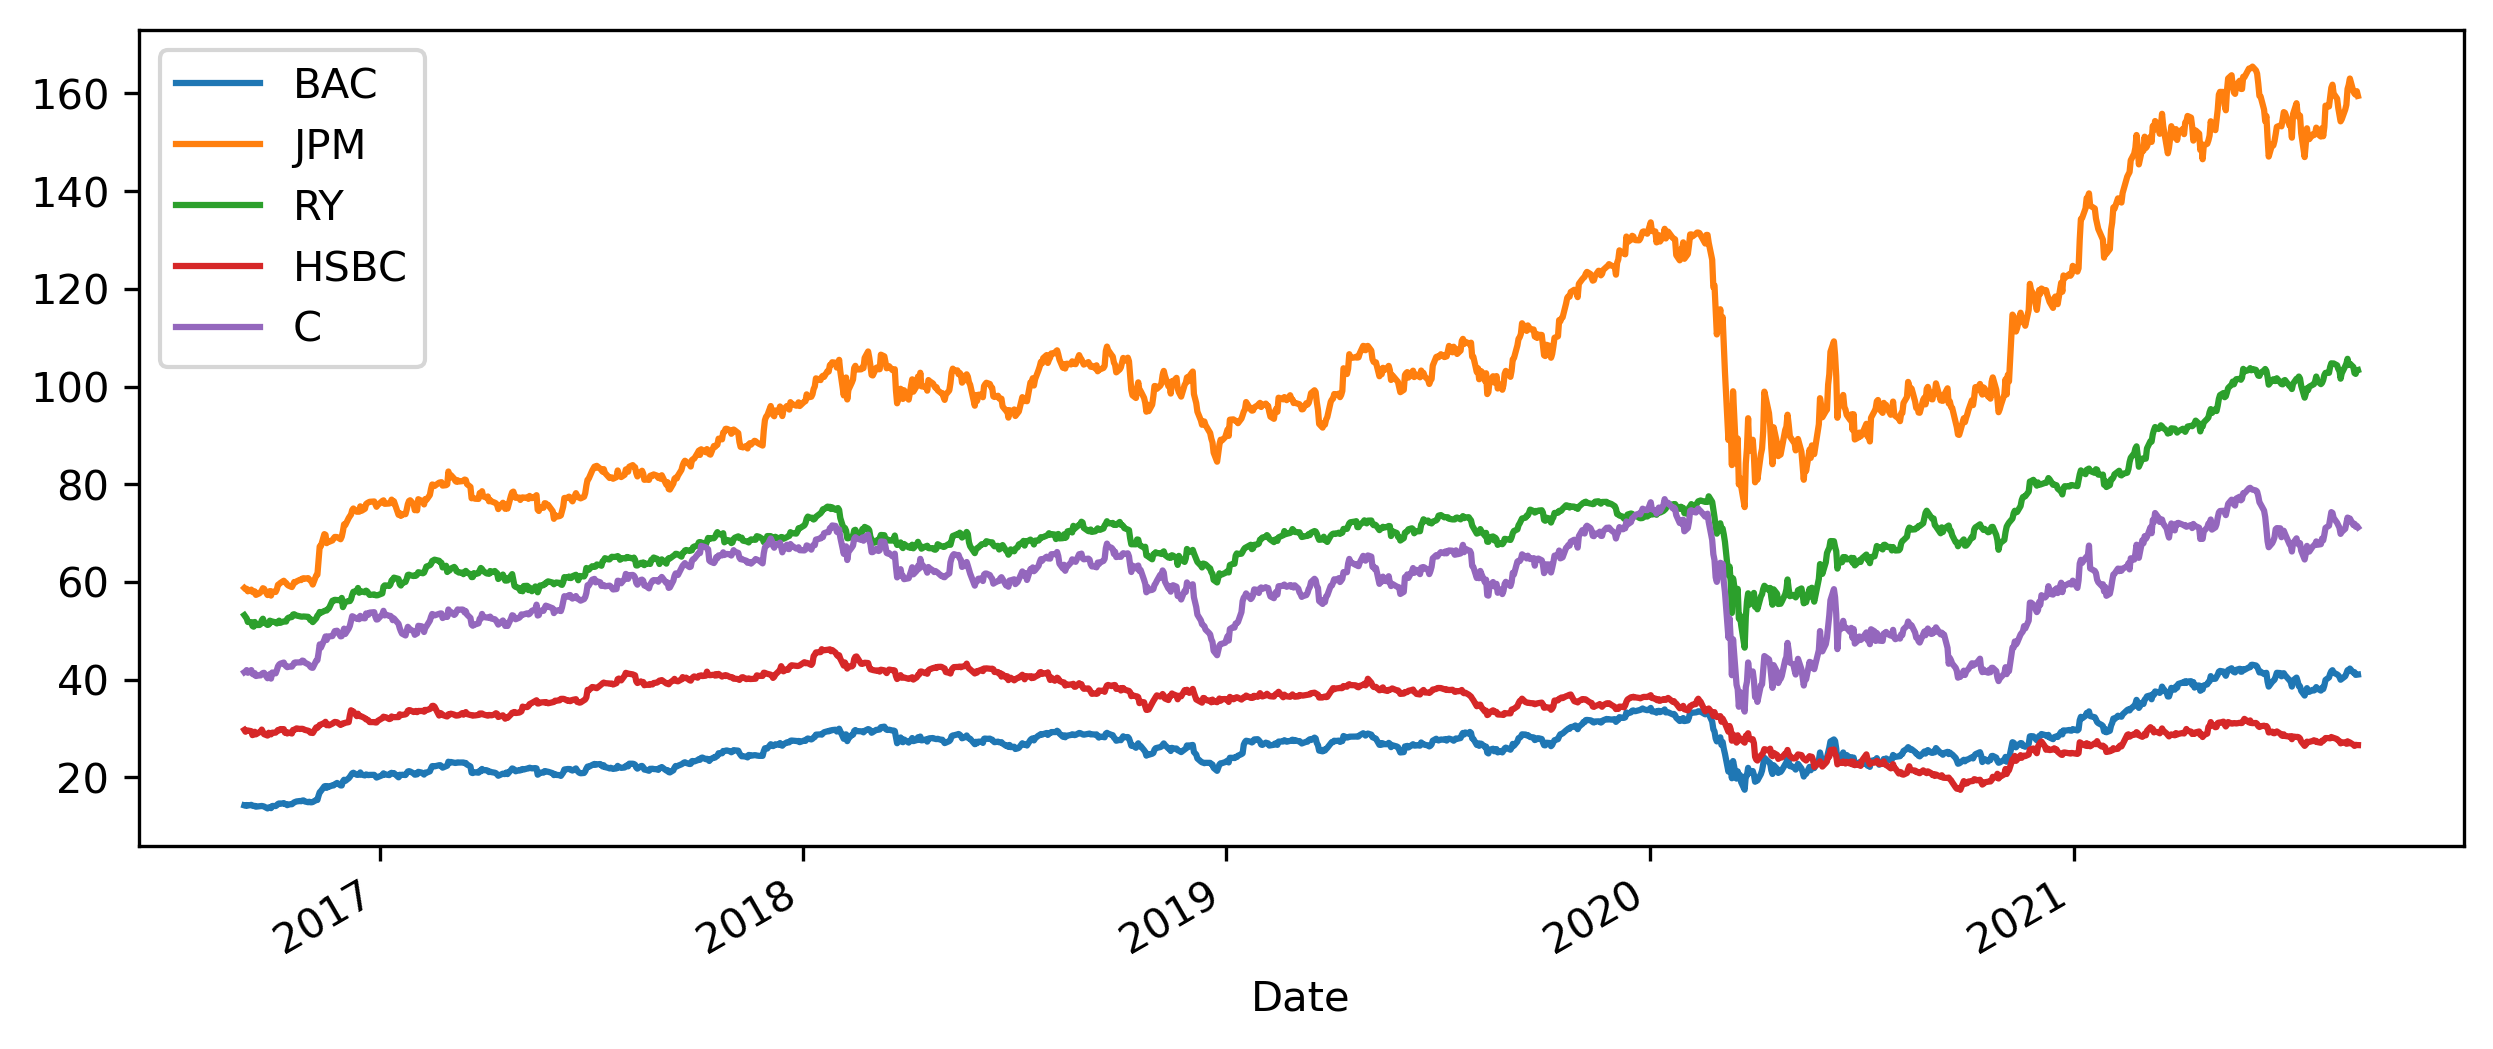

In [13]:
plt.figure(figsize=(10,4),dpi=300)
BAC['Adj Close'].plot(label='BAC')
JPM['Adj Close'].plot(label='JPM')
RY['Adj Close'].plot(label='RY')
HSBC['Adj Close'].plot(label='HSBC')
C['Adj Close'].plot(label='C')
plt.legend()

# Stock Percent Rise From A Particular Date

In [14]:
def percalc(ticker,startDate,endDate):
    if startDate not in ticker['Adj Close'].index:
        return f"Start date not in index"
    if endDate not in ticker['Adj Close'].index:
        return f"End date not in index"
    
    adj_close_start = ticker['Adj Close'][startDate]
    adj_close_end = ticker['Adj Close'][endDate]
    change = 100 * (adj_close_end - adj_close_start)/adj_close_start
    return f"Percent Change : {np.round(change,2)}"

    

In [15]:
percalc(BAC,'2016-09-06','2021-09-03')

'Percent Change : 187.74'

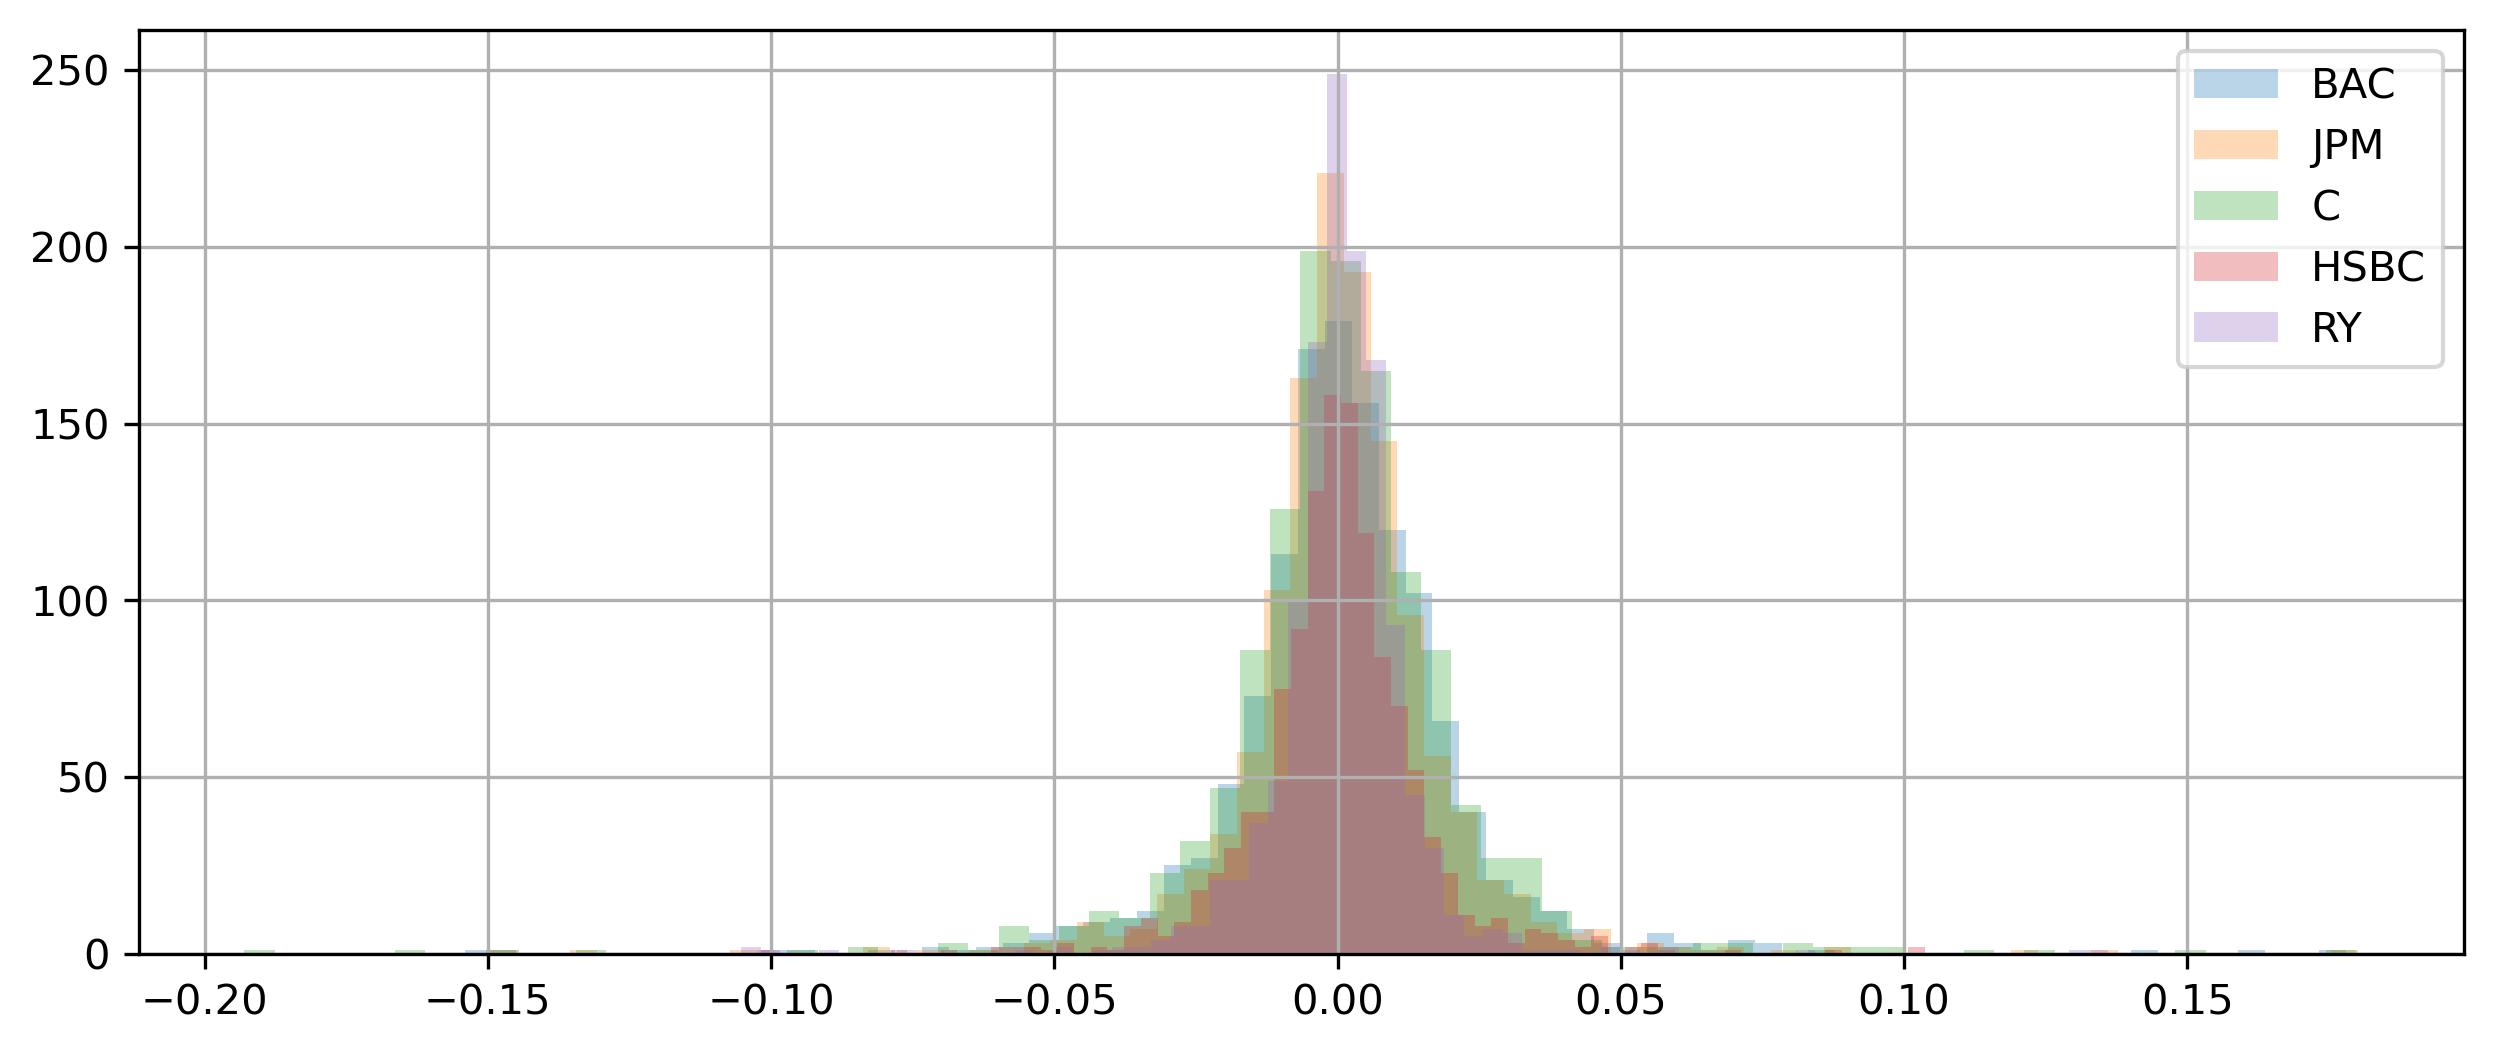

In [16]:
plt.figure(figsize=(10,4),dpi=300)
for stock_name,stock_df in portfolio_dict.items():
    stock_df['Adj Close'].pct_change(1).hist(label=stock_name,alpha=0.3,bins=70)
plt.legend()

# $10,000 BAC Shares at the start and end

In [17]:
bac_rets = BAC['Adj Close'].pct_change(1).dropna()

In [18]:
cummulative_rets = (bac_rets+1).cumprod()

<Axes: xlabel='Date'>

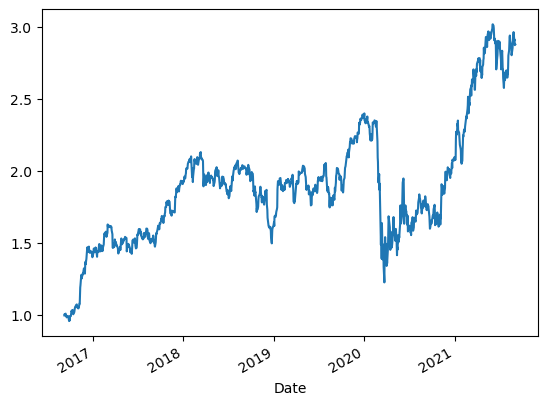

In [19]:
cummulative_rets.plot()

In [20]:
bac_10000 = cummulative_rets*10000

<Axes: xlabel='Date'>

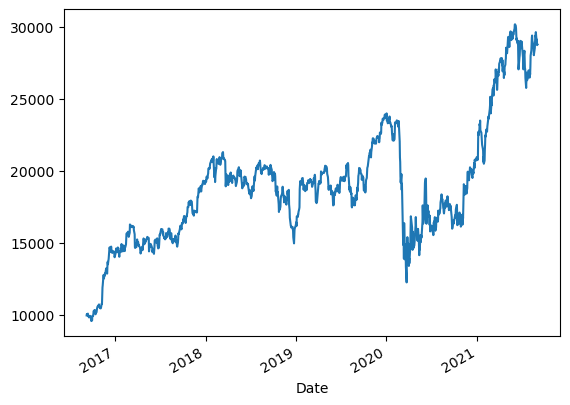

In [21]:
bac_10000.plot()

# Annualized Sharpe Ratio

In [26]:
def compute_sharpeRatio(data,riskFreeRate=0):
    mean_return = data['Adj Close'].pct_change(1).mean()
    std = data['Adj Close'].pct_change(1).std()
    sharpeRatio = (mean_return - riskFreeRate)/std
    return (252 ** 0.5) * sharpeRatio

In [27]:
for ticker,df in portfolio_dict.items():
    print(f"{ticker} Annualized sharpe ratio is  {compute_sharpeRatio(df)}")

BAC Annualized sharpe ratio is  0.7947267104783101
JPM Annualized sharpe ratio is  0.8165069200136574
C Annualized sharpe ratio is  0.47918276513516356
HSBC Annualized sharpe ratio is  0.03389350547471227
RY Annualized sharpe ratio is  0.7323176596668234


# Daily volume of stock traded over 5 years

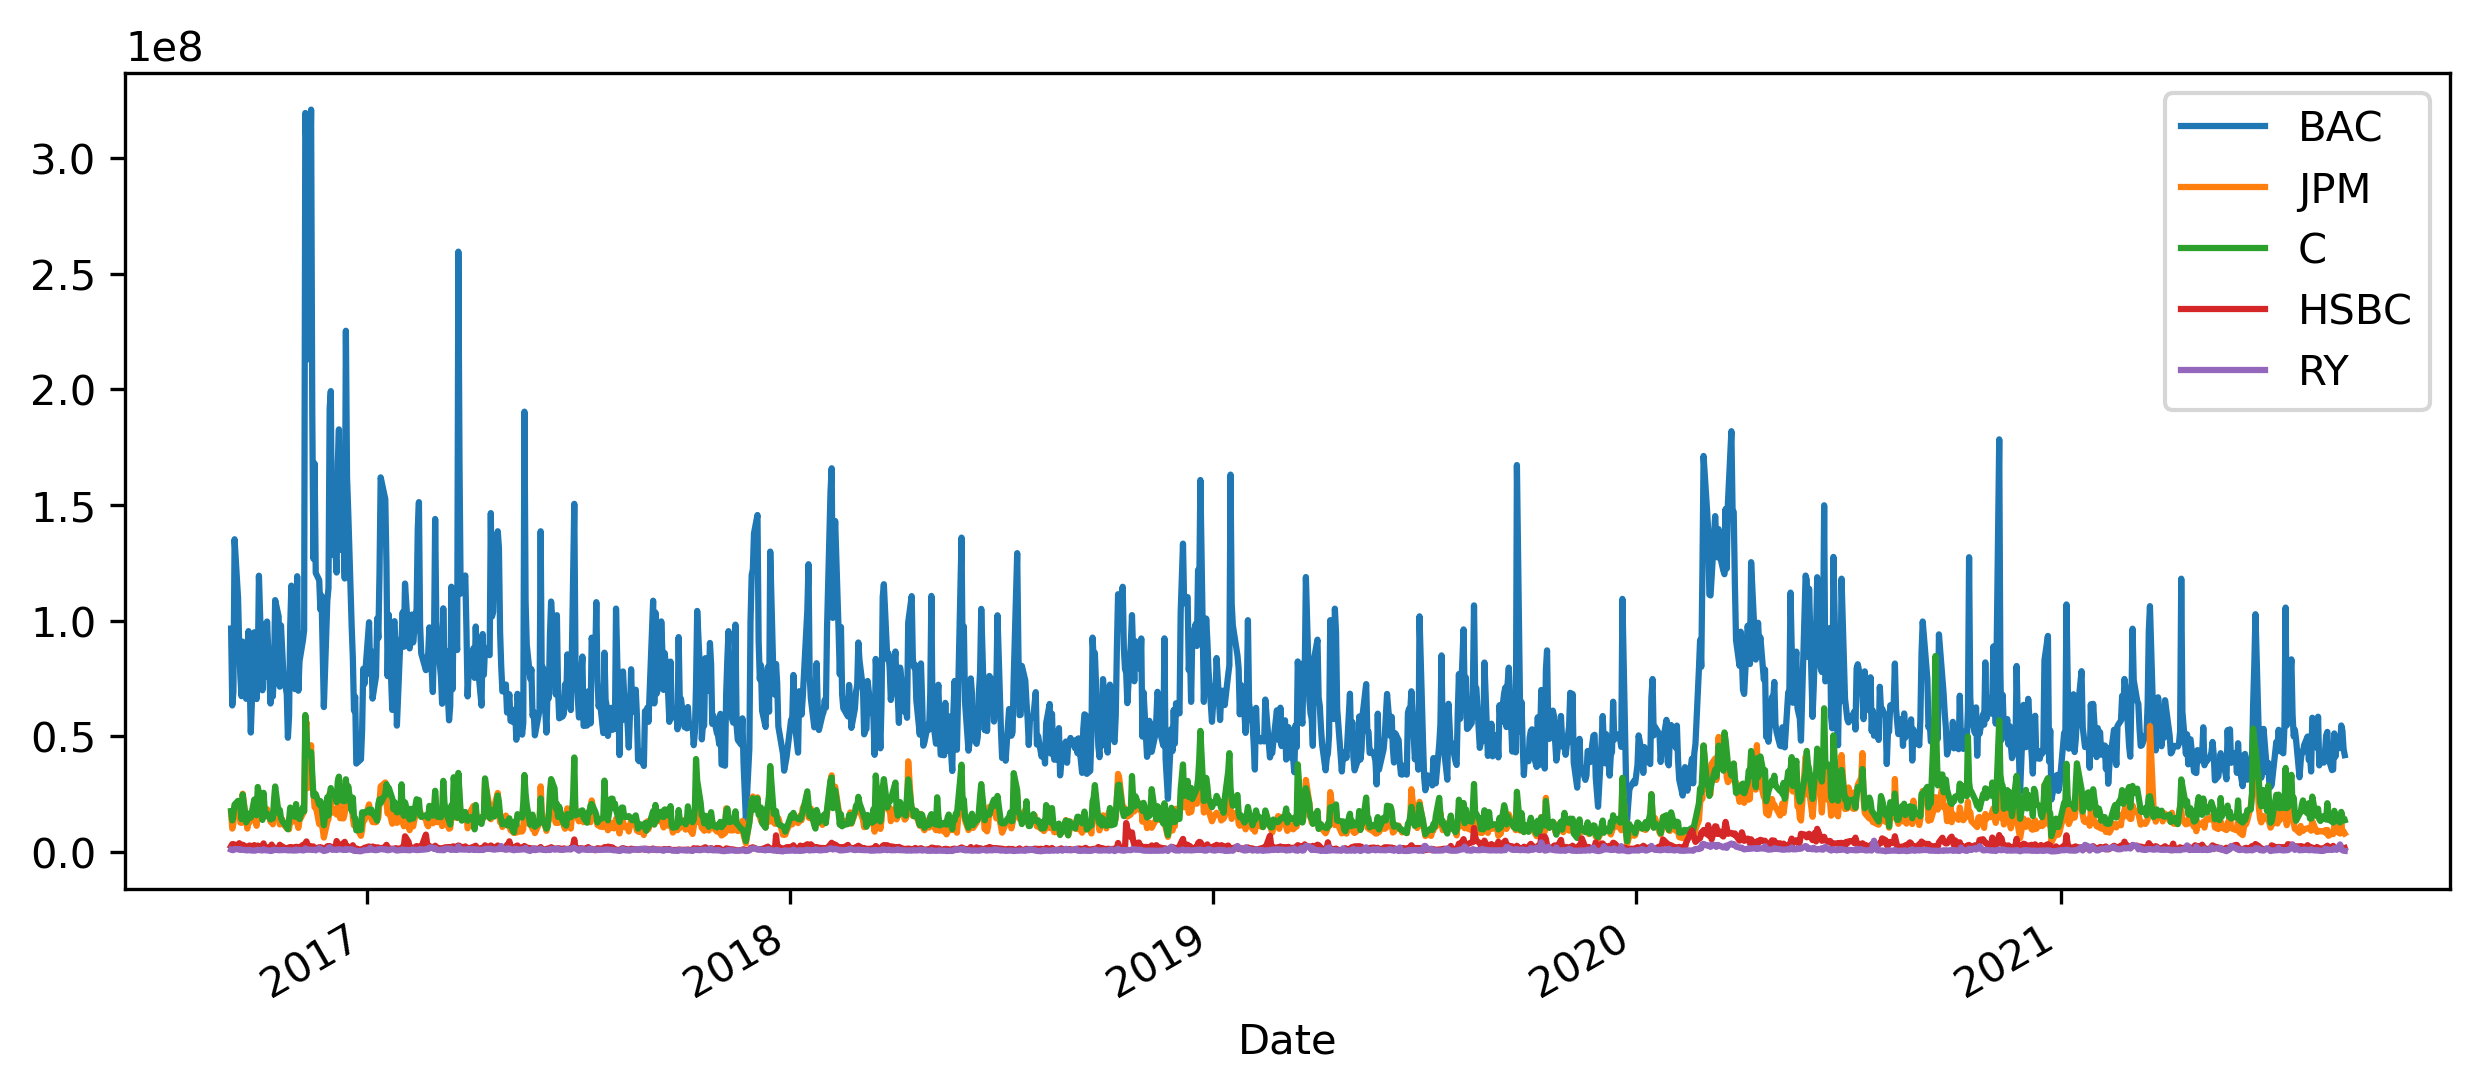

In [31]:
plt.figure(figsize=(10,4),dpi=300)
for stockName,stock_df in portfolio_dict.items():
    stock_df['Volume'].plot(label=stockName)

plt.legend()

# Price of volume of stock traded

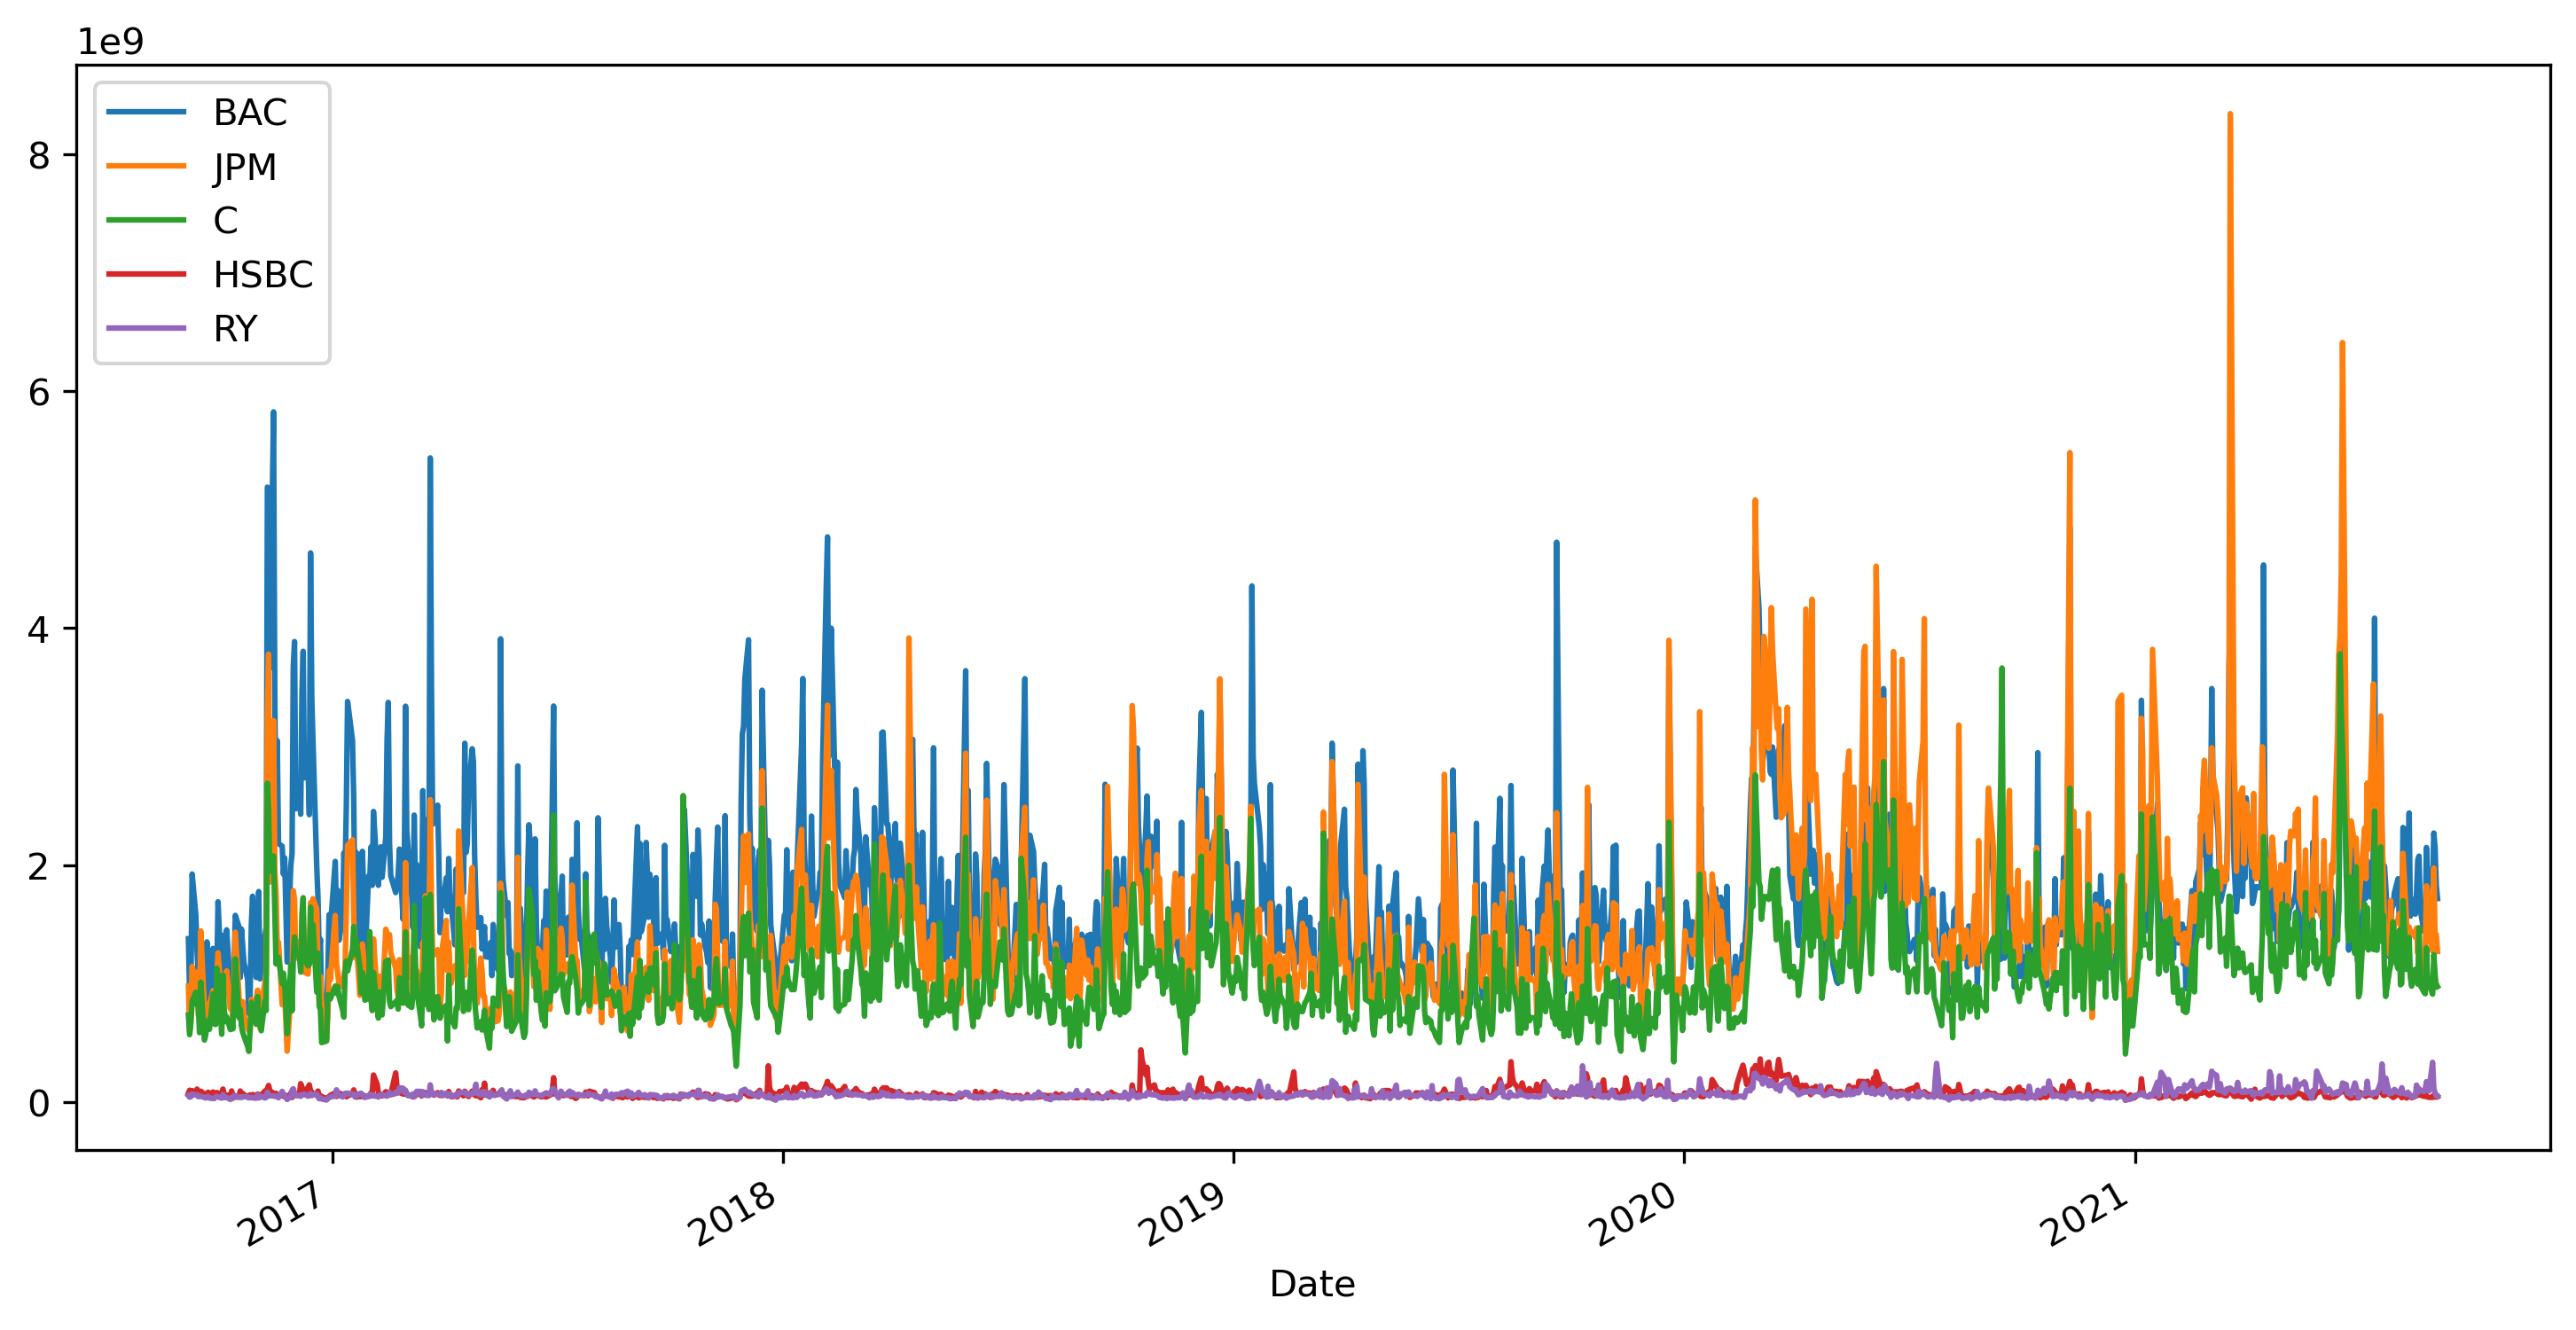

In [33]:
plt.figure(figsize=(12,6),dpi=300)
for stockName,stock_df in portfolio_dict.items():
    
    (stock_df['Volume']*stock_df['Adj Close']).plot(label=stockName)

plt.legend()

# Highest dollar value stock traded

In [34]:
JPM['Total Dollar Volume'] = JPM['Volume']*JPM['Adj Close']

In [35]:
JPM['Total Dollar Volume'].max()

8345011203.784801

In [36]:
JPM['Total Dollar Volume'].idxmax()

Timestamp('2021-03-19 00:00:00')

# ADJ Close Price with average

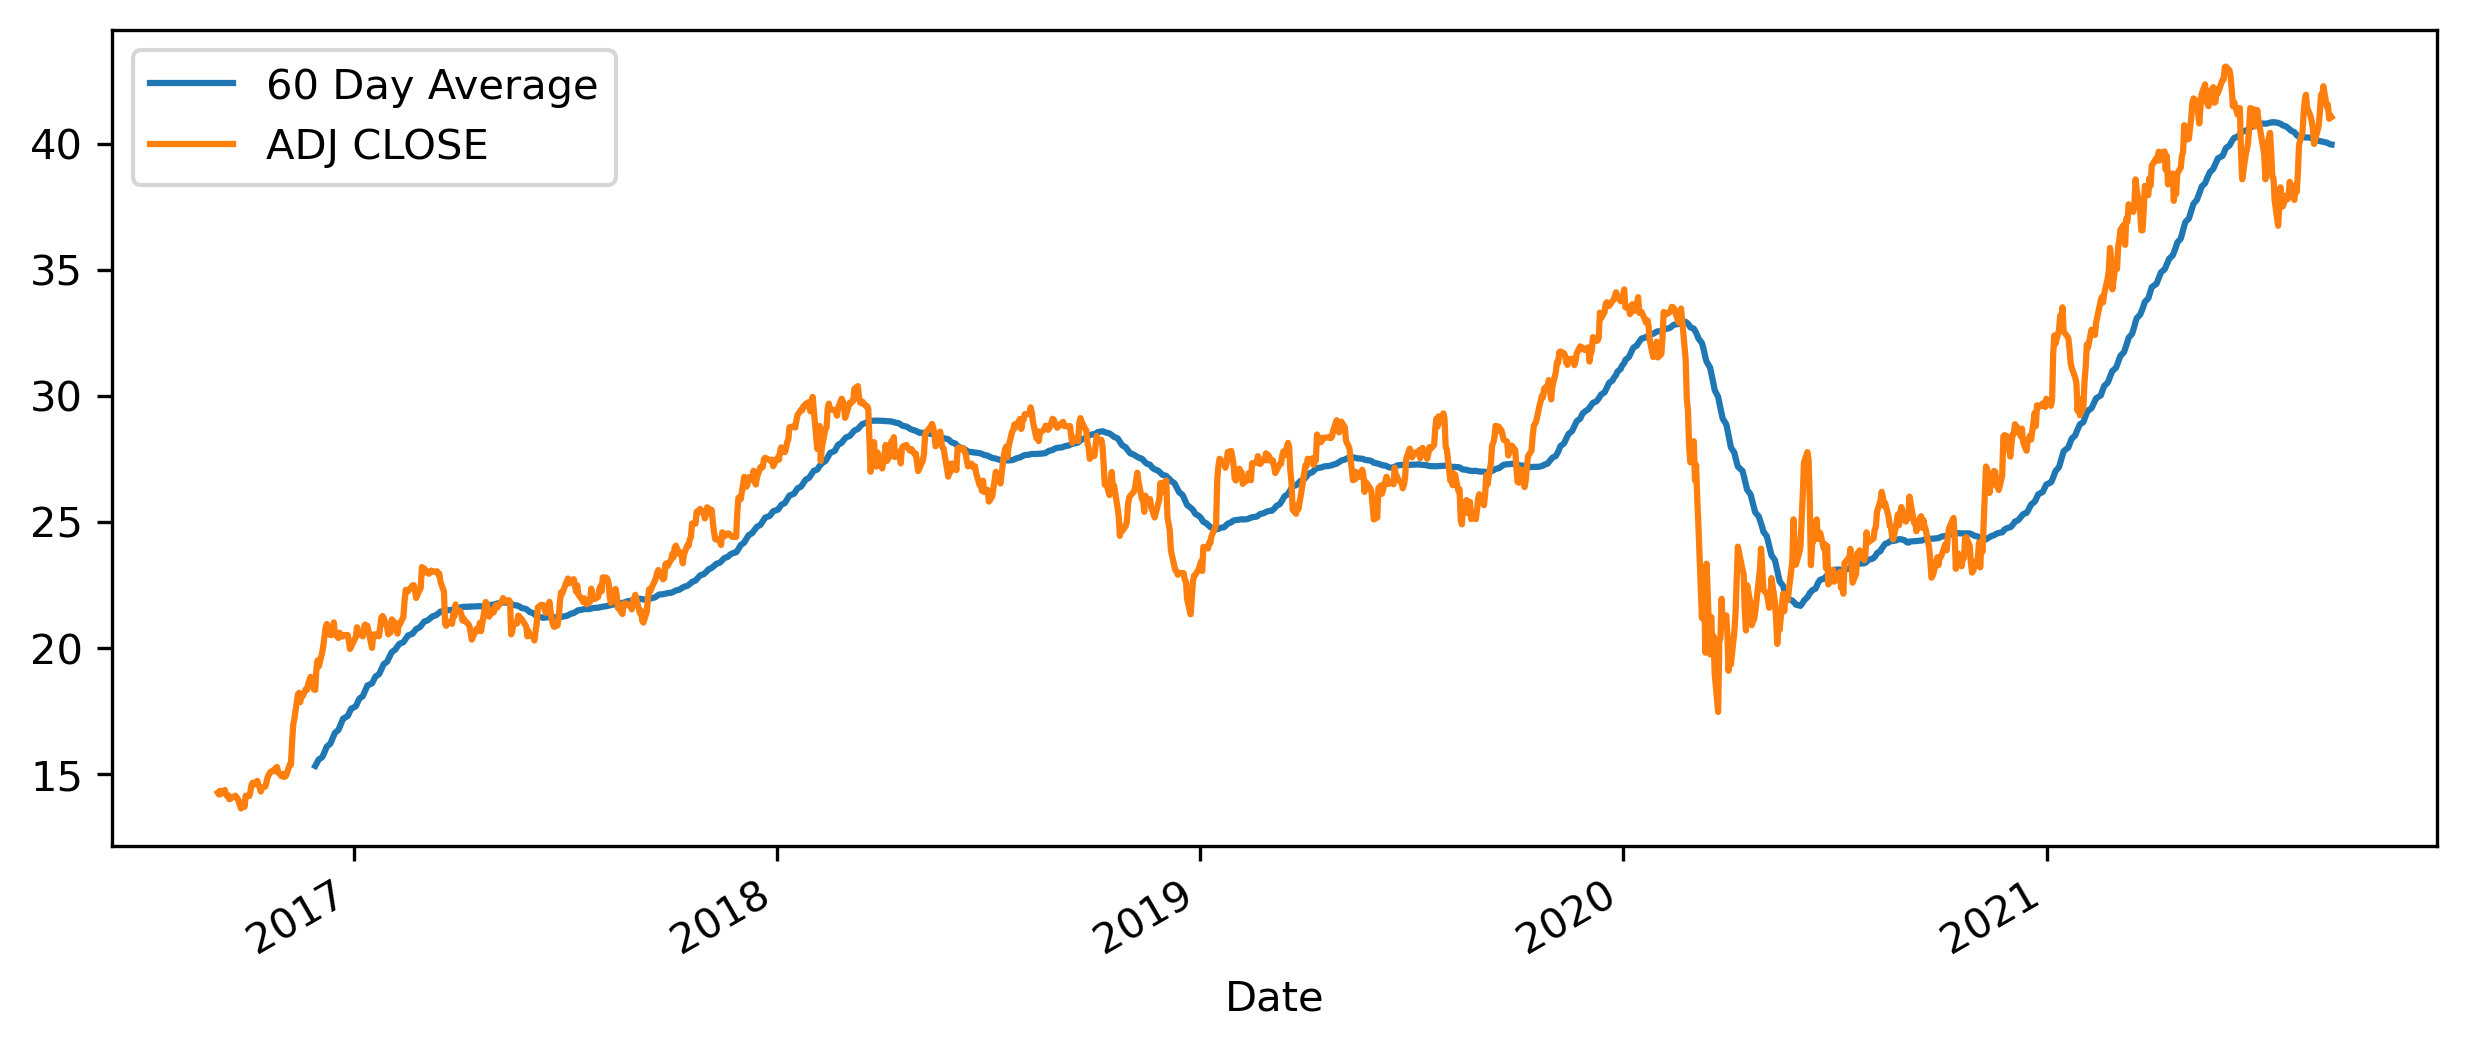

In [38]:
plt.figure(figsize=(10,4),dpi=300)
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day Average')
BAC['Adj Close'].plot(label='ADJ CLOSE')
plt.legend()

# Bollinger Band

<Axes: xlabel='Date'>

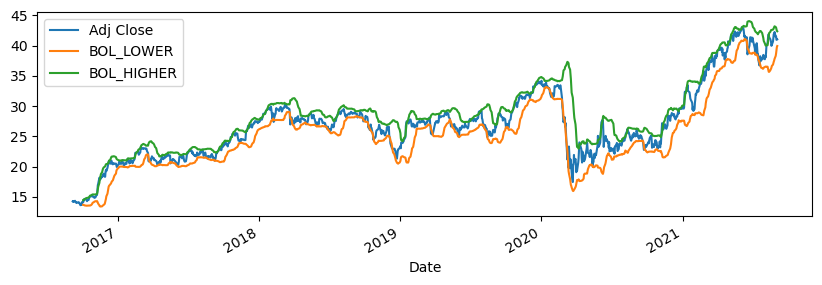

In [41]:
fig,ax = plt.subplots(figsize=(10,3))
BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()
BAC['BOL_LOWER'] = BAC['MA'] - 2 *BAC['STD']
BAC['BOL_HIGHER'] = BAC['MA'] + 2 *BAC['STD']
BAC[['Adj Close','BOL_LOWER','BOL_HIGHER']].plot(ax=ax)